In [1]:
### BERT MODEL

### The bert-base model has a vocabulary size of 30522 (vocab_size) → vocab_size. 
### The maximum length of the input sequences 512 tokens → model_max_length.
### Determines which side of the sequence to truncate when it exceeds the model_max_length. Right truncation means that ### tokens will be removed from the end of the sequence, left means tokens will be removed from start.

![](https://miro.medium.com/v2/resize:fit:1358/1*Qww2aaIdqrWVeNmo3AS0ZQ.png)

### token id's generation

In [62]:
from transformers import BertTokenizer
import numpy as np

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

long_sentences = [
    [
        "'When did Beyonce start becoming popular?",
        'Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ '
                            'bee-YON-say) (born September 4, 1981) is an '
                            'American singer, songwriter, record producer and '
                            'actress. Born and raised in Houston, Texas, she '
                            'performed in various singing and dancing '
                            'competitions as a child, and rose to fame in the '
                            'late 1990s as lead singer of R&B girl-group '
                            "Destiny's Child. Managed by her father, Mathew "
                            "Knowles, the group became one of the world's "
                            'best-selling girl groups of all time. Their '
                            "hiatus saw the release of Beyoncé's debut album, "
                            'Dangerously in Love (2003), which established her '
                            'as a solo artist worldwide, earned five Grammy '
                            'Awards and featured the Billboard Hot 100 '
                            'number-one singles "Crazy in Love" and "Baby '
                            'Boy".'
    ]
]

l=sorted(long_sentences,key=len,reverse=True)
max_length=len(long_sentences[0][1])
TOKEN_IDS=[]
i=0
SEGMENT_IDS=[]
for sentence in long_sentences:
    encoded_input = tokenizer(
        sentence[0],sentence[1],
        max_length=max_length,      
        truncation=True,     
        padding="max_length"
    )
    tokens = tokenizer.convert_ids_to_tokens(encoded_input["input_ids"])
    
    print(f"Question: {sentence[0][:]}...")  
#     print(f"Answer:{sentence[1]:[:]}...")
    print(f"Tokens: {tokens}...")       
    print(f"Token IDs: {encoded_input['input_ids']}...")
    print("\n")
#     print("Length of the sentence is",len(sentence[0].split(" ")))
    print("Token shape for sentence is",np.array([tokens]).shape)
#     print("Length of Encoded Input of this sentence is",len(encoded_input['input_ids'][:50]))
    print("\n")
    print("*********************************************************\n")
    
    
    
    
    TOKEN_IDS.append(np.array(encoded_input['input_ids']))
    SEGMENT_IDS.append(np.array([i for j in range(36)]))
    i+=1

Question: 'When did Beyonce start becoming popular?...
Tokens: ['[CLS]', "'", 'when', 'did', 'beyonce', 'start', 'becoming', 'popular', '?', '[SEP]', 'beyonce', 'gi', '##selle', 'knowles', '-', 'carter', '(', '/', 'bi', '##ː', '##ˈ', '##j', '##ɒ', '##nse', '##ɪ', '/', 'bee', '-', 'yo', '##n', '-', 'say', ')', '(', 'born', 'september', '4', ',', '1981', ')', 'is', 'an', 'american', 'singer', ',', 'songwriter', ',', 'record', 'producer', 'and', 'actress', '.', 'born', 'and', 'raised', 'in', 'houston', ',', 'texas', ',', 'she', 'performed', 'in', 'various', 'singing', 'and', 'dancing', 'competitions', 'as', 'a', 'child', ',', 'and', 'rose', 'to', 'fame', 'in', 'the', 'late', '1990s', 'as', 'lead', 'singer', 'of', 'r', '&', 'b', 'girl', '-', 'group', 'destiny', "'", 's', 'child', '.', 'managed', 'by', 'her', 'father', ',', 'mathew', 'knowles', ',', 'the', 'group', 'became', 'one', 'of', 'the', 'world', "'", 's', 'best', '-', 'selling', 'girl', 'groups', 'of', 'all', 'time', '.', 'their', '

![](https://www.researchgate.net/publication/341040234/figure/fig2/AS:885864246833153@1588217903153/Architecture-of-the-BERT-classification-model.png)

### Segment Id's

In [4]:
# from transformers import BertTokenizer

# tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# sentences=long_sentences

# max_length = 36 

# encoded_pair_1 = tokenizer(
#     sentences[0], sentences[1],
#     max_length=max_length,
#     padding="max_length",
#     truncation=True,
#     return_tensors="pt"
# )

# encoded_pair_2 = tokenizer(
#     sentences[1], sentences[2],
#     max_length=max_length,
#     padding="max_length",
#     truncation=True,
#     return_tensors="pt"
# )


# print("Pair 1 - Input IDs:", encoded_pair_1["input_ids"])
# print("Tensor shape: ",encoded_pair_1['input_ids'].shape)
# print("Pair 1 - Segment IDs:", encoded_pair_1["token_type_ids"])

# print("\nPair 2 - Input IDs:", encoded_pair_2["input_ids"])
# print("Tensor shape: ",encoded_pair_2['input_ids'].shape)
# print("Pair 2 - Segment IDs:", encoded_pair_2["token_type_ids"])


### Postional Id's

In [63]:
import torch

def generate_positional_ids(sentences, max_length):
    
    positional_ids = torch.arange(max_length).unsqueeze(0).expand(len(sentences), -1)
    
    return positional_ids

# Example usage
max_length=max_length
  # Specify the maximum length
positional_ids = generate_positional_ids(long_sentences, max_length)

print(" Complete Positional IDs:\n", positional_ids)
print("Shapes are: ")
POSITIONAL_IDS=[]
for tensors in positional_ids:
    print("********************************************")
    print(tensors)
    print(np.array([tensors]).shape)
    print("********************************************")
    POSITIONAL_IDS.append(np.array(tensors))

 Complete Positional IDs:
 tensor([[  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
          14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
          28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
          42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
          56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
          70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
          84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
          98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
         112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
         126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
         140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
         154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
         168, 169, 170, 1

In [64]:
TOKEN_IDS=np.array(TOKEN_IDS)
POSITIONAL_IDS=np.array(POSITIONAL_IDS)

In [65]:
print(TOKEN_IDS.shape)
# print(SEGMENT_IDS.shape)
print(POSITIONAL_IDS.shape)

(1, 694)
(1, 694)


In [66]:
combined_ids=TOKEN_IDS+POSITIONAL_IDS
print(combined_ids.shape)

(1, 694)


In [67]:
combined_ids

array([[  101,  1006,  2045,  2109, 20777,  2712,  3358,  2766,  1037,
          111, 20783, 21036, 19370, 22828,  1025,  5723,  1022,  1030,
        12188, 23451, 29735,  3522, 29700, 12348, 29709,  1038, 10532,
         1038, 10958,  2107,  1041,  2391,  1039,  1039,  2175,  2279,
         1054,  1047,  3299,  1046,  2043,  2060,  2179,  3263,  1054,
         6054,  1056,  2548,  3183,  2047,  3933,  1063,  2193,  2051,
         3046,  2054,  5451,  1067,  3204,  1069,  2076,  2925,  2061,
         2599,  4887,  2063,  5679,  6546,  2072,  1106,  2845,  1081,
         2070,  3196,  2074,  4551,  2075,  2073,  2475,  4213,  2084,
         2680,  3302,  2080,  1138,  1089,  1124,  2698,  1099,  2266,
        10551,  1096,  1147,  2868,  1106,  3361,  2107,  2111,  2367,
         1109, 25536, 22916,  1112,  2099,  2281,  2255,  2134,  2104,
         2104,  2197,  1115,  1166,  2302,  1124,  4969,  2726,  3083,
         2114,  2153,  2170,  1132,  2158, 14343,  2510,  2120,  2838,
      

## EMBEDDINGS

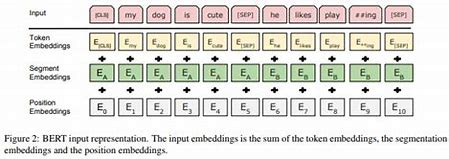

Token embeddings are generated by mapping discrete token IDs from a vocabulary to dense vector representations using an embedding layer, allowing models to work with numerical representations of the tokens.

In [68]:
import torch
import torch.nn as nn


def generate_token_embeddings(token_ids, vocab_size, hidden_size):
   
    embedding_layer = nn.Embedding(vocab_size, hidden_size)

    
    token_tensor = torch.nn.utils.rnn.pad_sequence(
        [torch.tensor(tokens) for tokens in token_ids],
        batch_first=True
    )


    embeddings = embedding_layer(token_tensor)

    return embeddings


vocab_size = 30522
hidden_size = 768

token_embeddings = generate_token_embeddings(TOKEN_IDS, vocab_size, hidden_size)

print("Token Embeddings Shape:", token_embeddings.shape)  

for i in range(len(long_sentences)):
    print("\nToken Embeddings for Sentence:\n",i, token_embeddings[i])
    print("Shape of the tensor: ",token_embeddings[i].shape)
    print("***************************************************************8")
    
print("Final Token Embeddings Shape: \n",token_embeddings.shape)

Token Embeddings Shape: torch.Size([1, 694, 768])

Token Embeddings for Sentence:
 0 tensor([[ 1.0425, -0.7983,  1.3874,  ...,  0.5769, -0.6412, -0.9604],
        [-0.8628,  0.8798, -0.3854,  ...,  1.1804, -0.8429,  1.1155],
        [ 0.9445, -1.1982, -1.2204,  ...,  0.4016, -0.4222,  1.3212],
        ...,
        [-0.5823, -0.1074,  0.4987,  ...,  0.3271, -1.1970,  0.7723],
        [-0.5823, -0.1074,  0.4987,  ...,  0.3271, -1.1970,  0.7723],
        [-0.5823, -0.1074,  0.4987,  ...,  0.3271, -1.1970,  0.7723]],
       grad_fn=<SelectBackward0>)
Shape of the tensor:  torch.Size([694, 768])
***************************************************************8
Final Token Embeddings Shape: 
 torch.Size([1, 694, 768])


### Positional Embeddings

Positional embeddings are generated by creating a fixed-size embedding for each position in the input sequence,  to provide information about the relative or absolute position of tokens, allowing the model to capture the order of the tokens in a sequence.

In [69]:
import torch
import torch.nn as nn

def generate_positional_embeddings(batch_size, max_length, hidden_size):
    positional_embeddings = nn.Embedding(max_length, hidden_size)
    positional_ids = torch.arange(max_length)
    embeddings = positional_embeddings(positional_ids)
    positional_embeddings_with_batch = embeddings.unsqueeze(0).expand(batch_size, -1, -1)
    return positional_embeddings_with_batch

batch_size = 1
max_length = max_length
hidden_size = 768  

positional_embeddings = generate_positional_embeddings(batch_size, max_length, hidden_size)
for i in range(batch_size):
    print("Positional Embeddings:", positional_embeddings[i])
    print("Shape: ",positional_embeddings[i].shape)
    print("********************************************************************\n")
print("\nFinal Positional Embeddings Shape:\n", positional_embeddings.shape)


Positional Embeddings: tensor([[ 1.1207, -0.6018, -0.5285,  ..., -0.6681,  1.0085, -0.6154],
        [ 0.0351,  0.6104, -0.1470,  ..., -0.2058, -0.5065, -1.0210],
        [ 0.5969, -2.2711,  0.6211,  ...,  1.6626,  1.9559,  0.9129],
        ...,
        [-1.3852,  0.4988, -0.8363,  ...,  0.6938,  0.2292, -0.4195],
        [ 0.9652,  2.8553, -2.5552,  ..., -1.6781,  0.6370, -0.0391],
        [-0.4293,  0.1476,  1.1714,  ..., -0.4472, -0.9187, -1.3772]],
       grad_fn=<SelectBackward0>)
Shape:  torch.Size([694, 768])
********************************************************************


Final Positional Embeddings Shape:
 torch.Size([1, 694, 768])


### Segment Embeddings

Segment embeddings are generated by using an embedding layer that assigns a unique dense vector to each segment (or sentence) in the input, typically initialized with two embeddings (for segment IDs 0 and 1) to differentiate between segments in tasks like sentence pair classification, allowing the model to distinguish which tokens belong to which segment.

In [70]:
import torch
import torch.nn as nn

def generate_segment_embeddings(segment_ids, hidden_size):
    # Create an embedding layer for two segments (0 and 1)
    segment_embeddings = nn.Embedding(2, hidden_size)
    
    # Get the segment embeddings using the segment IDs
    embeddings = segment_embeddings(segment_ids)
    
    return embeddings

# Example parameters
batch_size = 1
max_length = max_length
hidden_size = 768  

# Example segment IDs: a tensor of shape (batch_size, max_length)
# Here, the first half is segment 0 and the second half is segment 1
SEGMENT_IDS = torch.zeros((batch_size, max_length), dtype=torch.long)
SEGMENT_IDS[:, max_length // 2:] = 1

# Generate segment embeddings
segment_embeddings = generate_segment_embeddings(SEGMENT_IDS, hidden_size)
for i in range(batch_size):
    print("Segment Embedding: ",segment_embeddings[i])
    print("Shape: ",segment_embeddings[i].shape)
    print("***************************************************************************")
# Output shape and embeddingsape:", segment_embeddings.shape)  # Should be (batch_size, max_length, hidden_size)
print("\nFinal Segment Embeddings:\n", segment_embeddings.shape)


Segment Embedding:  tensor([[ 1.2448,  1.3766, -0.2539,  ...,  0.7216, -0.4996, -0.6447],
        [ 1.2448,  1.3766, -0.2539,  ...,  0.7216, -0.4996, -0.6447],
        [ 1.2448,  1.3766, -0.2539,  ...,  0.7216, -0.4996, -0.6447],
        ...,
        [ 0.3944,  0.9136, -0.0994,  ...,  0.6758, -0.1365, -0.7785],
        [ 0.3944,  0.9136, -0.0994,  ...,  0.6758, -0.1365, -0.7785],
        [ 0.3944,  0.9136, -0.0994,  ...,  0.6758, -0.1365, -0.7785]],
       grad_fn=<SelectBackward0>)
Shape:  torch.Size([694, 768])
***************************************************************************

Final Segment Embeddings:
 torch.Size([1, 694, 768])


In [14]:
# import torch
# import torch.nn.functional as F
# import random
# segment_embedding_1 = torch.rand((36, 768))
# segment_embedding_2 = torch.rand((36, 768))

# cosine_similarity = F.cosine_similarity(segment_embedding_1, segment_embedding_2)

# print("Cosine Similarity:", cosine_similarity)


In [71]:
combined_embeddings=token_embeddings+positional_embeddings
combined_embeddings.shape

torch.Size([1, 694, 768])

In [72]:
combined_embeddings

tensor([[[ 2.1632, -1.4001,  0.8589,  ..., -0.0912,  0.3673, -1.5758],
         [-0.8276,  1.4902, -0.5323,  ...,  0.9746, -1.3494,  0.0946],
         [ 1.5413, -3.4692, -0.5993,  ...,  2.0642,  1.5338,  2.2341],
         ...,
         [-1.9675,  0.3914, -0.3375,  ...,  1.0209, -0.9678,  0.3528],
         [ 0.3829,  2.7479, -2.0564,  ..., -1.3509, -0.5600,  0.7332],
         [-1.0116,  0.0402,  1.6702,  ..., -0.1201, -2.1157, -0.6049]]],
       grad_fn=<AddBackward0>)

### Attention Mask

In [73]:
import torch

def generate_attention_mask(combined_embeddings):
    batch_size, max_length, _ = combined_embeddings.shape
    
    attention_mask = (combined_embeddings != 0).any(dim=-1).long()
    
    return attention_mask

batch_size = 1
max_length = max_length
hidden_size = 768


combined_embeddings = torch.rand((batch_size, max_length, hidden_size))  

attention_mask = generate_attention_mask(combined_embeddings)


print("Attention Mask Shape:", attention_mask.shape)  
print("Attention Mask:\n", attention_mask)


Attention Mask Shape: torch.Size([1, 694])
Attention Mask:
 tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

### Attention Mechanism

## 1. Input Preparation
### Input Tensor: The input to the multi-head attention layer is a tensor of shape (batch_size, seq_length, hidden_size), where:
### batch_size is the number of input sequences processed simultaneously.
### seq_length is the length of each input sequence (number of tokens).
### hidden_size is the dimensionality of each token's embedding.

## 2. Linear Transformations
### Linear Layers: Three separate linear transformations are applied to the input tensor to produce the queries, keys, and values:
### Queries: Generated by passing the input through a linear layer designed for queries.
### Keys: Generated by passing the input through a linear layer designed for keys.
### Values: Generated by passing the input through a linear layer designed for values.

## 3. Shape of Queries, Keys, and Values
### After the linear transformations, the shapes of the resulting matrices are:
### Queries Matrix: (batch_size, seq_length, hidden_size)
### Keys Matrix: (batch_size, seq_length, hidden_size)
### Values Matrix: (batch_size, seq_length, hidden_size)

## 4. Reshaping for Multi-Head Attention
### Multi-Head Reshaping: Each of the queries, keys, and values matrices is reshaped to allow for multi-head attention:
### The matrices are reshaped to (batch_size, num_heads, seq_length, head_dim), where:
### head_dim = hidden_size / num_heads
### This involves splitting the hidden_size dimension into multiple heads, enabling the model to learn different representations in parallel.

## 5. Output of the Transformation
# # 1. ### Final Output: The resulting queries, keys, and values matrices are used in the attention computation. Each matrix retains the context of the input sequences while allowing the model to focus on different parts of the input through attention scores.

![](https://www.researchgate.net/publication/366985717/figure/fig4/AS:11431281112323043@1673383393149/Scaled-Dot-Product-Attention-mapping-a-query-and-a-set-of-key-value-pairs-to-an-output.png)

In [74]:
import torch
import torch.nn as nn

class MultiHeadAttention(nn.Module):
    def __init__(self, hidden_size, num_heads):
        super(MultiHeadAttention, self).__init__()
        self.num_heads = num_heads
        self.head_dim = hidden_size // num_heads

        assert (
            hidden_size % num_heads == 0
        ), "hidden_size must be divisible by num_heads"

        self.query_linear = nn.Linear(hidden_size, hidden_size)
        self.key_linear = nn.Linear(hidden_size, hidden_size)
        self.value_linear = nn.Linear(hidden_size, hidden_size)
        self.fc_out = nn.Linear(hidden_size, hidden_size)

    def forward(self, x):
        batch_size, seq_length, hidden_size = x.size()

        queries = self.query_linear(x)  
        keys = self.key_linear(x)
        values = self.value_linear(x)

        # Print the query, key, and value matrices
        print("\nQueries Matrix:- ",queries)
        print("Queries Matrix Shape:", queries.shape)
        print("\nKeys Matrix:- ",keys)
        print("Keys Matrix Shape:", keys.shape)
        print("\nValues Matrix:- ",values)
        print("Values Matrix Shape:", values.shape)

        # Reshape for multi-head attention
        queries = queries.view(batch_size, seq_length, self.num_heads, self.head_dim).transpose(1, 2)  # (batch_size, num_heads, seq_length, head_dim)
        keys = keys.view(batch_size, seq_length, self.num_heads, self.head_dim).transpose(1, 2)  # (batch_size, num_heads, seq_length, head_dim)
        values = values.view(batch_size, seq_length, self.num_heads, self.head_dim).transpose(1, 2)  # (batch_size, num_heads, seq_length, head_dim)
        energy = torch.einsum("nhqd,nhkd->nhqk", [queries, keys])  # (batch_size, num_heads, seq_length, seq_length)

        attention_scores = energy / (self.head_dim ** 0.5)
        print("Attention scores shape: ",attention_scores.shape)
        attention = torch.softmax(energy / (self.head_dim ** 0.5), dim=3)  # Scale and softmax
        print("Attention score shape after softmax: ",attention.shape)
        out = torch.einsum("nhql,nhld->nhqd", [attention, values]).reshape(batch_size, seq_length, hidden_size)  # (batch_size, seq_length, hidden_size)
        out = self.fc_out(out)  # Final linear layer

        return out


batch_size = 1
seq_length = max_length
hidden_size = 768
num_heads = 12

attention_layer = MultiHeadAttention(hidden_size, num_heads)


combined_embeddings = combined_embeddings


output_embeddings = attention_layer(combined_embeddings)

print("Output Embeddings Shape:", output_embeddings.shape)  




Queries Matrix:-  tensor([[[-0.7487,  0.1315, -0.3163,  ...,  0.0329, -0.1276,  0.2806],
         [-0.6895, -0.2051, -0.2112,  ...,  0.4104, -0.1640,  0.3503],
         [-0.4780, -0.0153,  0.2025,  ...,  0.1060, -0.1197,  0.4763],
         ...,
         [-0.7116,  0.1268,  0.2733,  ...,  0.0900, -0.1892,  0.3336],
         [-0.6334,  0.1781,  0.2598,  ...,  0.4137,  0.0146,  0.2321],
         [-0.6642,  0.0908, -0.0684,  ...,  0.3256,  0.0240,  0.4736]]],
       grad_fn=<ViewBackward0>)
Queries Matrix Shape: torch.Size([1, 694, 768])

Keys Matrix:-  tensor([[[-0.1145, -0.0394,  0.1591,  ..., -0.2300,  0.0603,  0.2490],
         [-0.4580, -0.1131,  0.4583,  ..., -0.2053,  0.1089,  0.4305],
         [-0.4292,  0.0532,  0.2541,  ...,  0.0468, -0.1139,  0.4879],
         ...,
         [-0.1616, -0.0476,  0.2804,  ...,  0.0341,  0.0465,  0.1618],
         [-0.1083, -0.1008,  0.3135,  ..., -0.5782, -0.1123, -0.0492],
         [-0.8932, -0.1812, -0.0311,  ..., -0.3090,  0.1945,  0.1943]]],
 

In [75]:
output_embeddings

tensor([[[-0.1941,  0.1387,  0.3639,  ...,  0.1683, -0.1276, -0.2720],
         [-0.1942,  0.1389,  0.3640,  ...,  0.1682, -0.1275, -0.2721],
         [-0.1940,  0.1389,  0.3640,  ...,  0.1684, -0.1275, -0.2719],
         ...,
         [-0.0108,  0.1572, -0.0082,  ..., -0.0688,  0.2868, -0.4025],
         [-0.0108,  0.1572, -0.0082,  ..., -0.0687,  0.2867, -0.4025],
         [-0.0106,  0.1570, -0.0083,  ..., -0.0689,  0.2864, -0.4023]]],
       grad_fn=<ViewBackward0>)

In [85]:
class QAHead(nn.Module):
    def __init__(self, hidden_size):
        super(QAHead, self).__init__()
        self.start_logits = nn.Linear(hidden_size, 1)
        self.end_logits = nn.Linear(hidden_size, 1)

    def forward(self, embeddings):
        start_logits = self.start_logits(embeddings).squeeze(-1)  
        end_logits = self.end_logits(embeddings).squeeze(-1)      
        return start_logits, end_logits

In [90]:
qa_head = QAHead(hidden_size)
start_logits, end_logits = qa_head(output_embeddings)

print("Start Logits Shape:", start_logits.shape)  
print("End Logits Shape:", end_logits.shape)      


Start Logits Shape: torch.Size([1, 694])
End Logits Shape: torch.Size([1, 694])


In [91]:
start_logits,end_logits

(tensor([[ 0.0649,  0.0648,  0.0649,  0.0650,  0.0650,  0.0649,  0.0648,  0.0651,
           0.0649,  0.0651,  0.0650,  0.0651,  0.0648,  0.0650,  0.0649,  0.0649,
           0.0648,  0.0649,  0.0649,  0.0650,  0.0652,  0.0649,  0.0648,  0.0648,
           0.0649,  0.0648,  0.0650,  0.0650,  0.0649,  0.0649,  0.0649,  0.0650,
           0.0648,  0.0649,  0.0649,  0.0649,  0.0650,  0.0649,  0.0650,  0.0651,
           0.0650,  0.0650,  0.0649,  0.0649,  0.0650,  0.0650,  0.0649,  0.0649,
           0.0651,  0.0650,  0.0648,  0.0649,  0.0649,  0.0650,  0.0649,  0.0649,
           0.0649,  0.0978,  0.2859,  0.2860,  0.2861,  0.2860,  0.2859,  0.2861,
           0.2860,  0.2860,  0.2860,  0.2862,  0.2860,  0.2860,  0.2859,  0.2861,
           0.2860,  0.2861,  0.2860,  0.2861,  0.2861,  0.2860,  0.2860,  0.2860,
           0.2861,  0.2860,  0.2861,  0.2859,  0.2859,  0.2860,  0.2860,  0.2860,
           0.2859,  0.2860,  0.2861,  0.2861,  0.2861,  0.2859,  0.2861,  0.2861,
           0.285

In [92]:
start_positions = torch.argmax(start_logits, dim=-1)
end_positions = torch.argmax(end_logits, dim=-1)
start_positions,end_positions

(tensor([98]), tensor([537]))

In [80]:
output1=TOKEN_IDS[0][14:58]

In [93]:
for idx in range(1):
    start_idx=start_positions[idx]
    end_idx=end_positions[idx]
    if start_idx > end_idx:
        start_idx, end_idx = end_idx, start_idx
    predicted_answer_tokens = TOKEN_IDS[idx][start_idx:end_idx + 1]
    predicted_answer = tokenizer.decode(predicted_answer_tokens, skip_special_tokens=True)
    print("Question: ",l[idx][0])
    print("Predicted answer:",predicted_answer)
    print(len(predicted_answer.split(" ")))

Question:  'When did Beyonce start becoming popular?
Predicted answer: father, mathew knowles, the group became one of the world's best - selling girl groups of all time. their hiatus saw the release of beyonce's debut album, dangerously in love ( 2003 ), which established her as a solo artist worldwide, earned five grammy awards and featured the billboard hot 100 number - one singles " crazy in love " and " baby boy ".
65


### QA Answering

In [50]:
from transformers import BertModel, BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')

question="What is Cybersecurity?"
answer="Cybersecurity is the practice of protecting systems, networks, and programs from digital attacks, theft, or damage. These cyberattacks usually aim to access, alter, or destroy sensitive information, extort money, or disrupt normal business ope"

encoding = tokenizer.encode_plus(question,answer, add_special_tokens=True, return_tensors='pt')

input_ids = encoding['input_ids']
attention_mask = encoding['attention_mask']

with torch.no_grad():
    outputs = bert_model(input_ids, attention_mask=attention_mask)

    hidden_states = outputs.last_hidden_state  




In [33]:

output_embeddings = attention_layer(hidden_states)

qa_head = QAHead(hidden_size)
start_logits, end_logits = qa_head(output_embeddings)

print("Start Logits Shape:", start_logits.shape)
print("End Logits Shape:", end_logits.shape)


Queries Matrix:-  tensor([[[ 0.0184,  0.1611, -0.3836,  ...,  0.1292,  0.4669, -0.2030],
         [-0.0058,  0.2297, -0.3609,  ...,  0.4139, -0.1394, -0.2541],
         [ 0.4735,  0.3752, -0.1296,  ...,  0.1937,  0.0320, -0.2238],
         ...,
         [ 0.1912,  0.5141,  0.0985,  ...,  0.4373,  0.6104,  0.2989],
         [ 0.0195,  0.0310, -0.3529,  ...,  0.2429,  0.5118, -0.0774],
         [ 0.6381, -0.2803,  0.3057,  ..., -0.0850,  0.0414,  0.0916]]],
       grad_fn=<ViewBackward0>)
Queries Matrix Shape: torch.Size([1, 61, 768])

Keys Matrix:-  tensor([[[ 0.1287,  0.2809, -0.3580,  ...,  0.3848, -0.7865, -0.5094],
         [ 0.2947,  0.5971, -0.1008,  ..., -0.0371, -0.1447, -0.4061],
         [-0.1096, -0.2498, -0.2423,  ..., -0.3773, -0.1692, -0.2863],
         ...,
         [-0.0065,  0.2280, -0.0071,  ...,  0.3097, -0.9183, -0.6319],
         [ 0.6146,  0.2203, -0.0187,  ...,  0.5495, -0.6867, -0.5252],
         [ 0.0040, -0.0214, -0.2281,  ..., -0.1594, -0.2313, -0.3072]]],
  

In [34]:
start_logits, end_logits

(tensor([[-0.1130, -0.1107, -0.1124, -0.1113, -0.1130, -0.1404, -0.1513, -0.1548,
          -0.1522, -0.1521,  0.0556,  0.0391,  0.0387,  0.0387,  0.0395,  0.0049,
          -0.0209, -0.0213, -0.0220, -0.0225, -0.0092, -0.0129, -0.0140, -0.0148,
          -0.0153, -0.0275, -0.0342, -0.0337, -0.0349, -0.0322,  0.0173,  0.0541,
           0.0569,  0.0553,  0.0550, -0.0461, -0.0779, -0.0786, -0.0773, -0.0784,
          -0.0210, -0.0703, -0.0700, -0.0711, -0.0715, -0.0223,  0.0030,  0.0037,
           0.0040,  0.0045, -0.0220,  0.0123,  0.0123,  0.0117,  0.0119,  0.0152,
          -0.0525, -0.0536, -0.0538, -0.0553, -0.0545]],
        grad_fn=<SqueezeBackward1>),
 tensor([[ 0.0662,  0.0644,  0.0671,  0.0652,  0.0666, -0.0640, -0.0458, -0.0466,
          -0.0444, -0.0459,  0.0934,  0.1679,  0.1741,  0.1658,  0.1715,  0.0750,
           0.0351,  0.0322,  0.0354,  0.0348,  0.0864,  0.0489,  0.0483,  0.0524,
           0.0515,  0.0594,  0.0904,  0.0876,  0.0878,  0.0882,  0.0730,  0.0593,
    

In [35]:
# Find the index of the start and end token with the highest logits
start_idx = torch.argmax(start_logits, dim=-1).item()
end_idx = torch.argmax(end_logits, dim=-1).item()
start_idx,end_idx

(32, 42)

In [37]:
# # Find the index of the start and end token with the highest logits
# start_idx = torch.argmax(start_logits, dim=-1).item()
# end_idx = torch.argmax(end_logits, dim=-1).item()

# Ensure start_idx <= end_idx (sometimes due to noise, the start index could be after the end index)
if start_idx > end_idx:
    start_idx, end_idx = end_idx, start_idx

# Decode the answer from the token indices
predicted_answer_tokens = input_ids[0][start_idx:end_idx + 1]
predicted_answer = tokenizer.decode(predicted_answer_tokens, skip_special_tokens=True)
# print("Question:",kk[0])
print("Predicted Answer:", predicted_answer)


Predicted Answer: . these cyberattacks usually aim to access,


In [38]:
print(input_ids)

tensor([[  101,  2054,  2003, 16941,  3366, 10841, 15780,  1029,   102, 16941,
          3366, 10841, 15780,  2003,  1996,  3218,  1997,  8650,  3001,  1010,
          6125,  1010,  1998,  3454,  2013,  3617,  4491,  1010, 11933,  1010,
          2030,  4053,  1012,  2122, 16941, 19321,  8684,  2015,  2788,  6614,
          2000,  3229,  1010, 11477,  1010,  2030,  6033,  7591,  2592,  1010,
          4654, 25485,  2769,  1010,  2030, 23217,  3671,  2449,  6728,  2063,
           102]])


In [39]:
bert_model

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

In [21]:
" What the tokenizer.decode does? It decodes the embeddings into human readable text format"

' What the tokenizer.decode does? It decodes the embeddings into human readable text format'

In [ ]:
token_ids = [10, 203, 203, 903, 2741, 11]  # Example token IDs
decoded_text = tokenizer.decode(token_ids, skip_special_tokens=True)
print(decoded_text)  # Output: "This is a test"


In [47]:
class SimpleTokenizer:
    def __init__(self, vocab):
        # Initialize with a vocabulary mapping token IDs to tokens
        self.vocab = vocab
    
    def convert_ids_to_tokens(self, token_ids):
        # Convert token IDs to their corresponding tokens
        return [self.vocab.get(token_id, '[UNK]') for token_id in token_ids]

    def convert_tokens_to_string(self, tokens):
        # Join tokens into a single string with spaces and handle subwords
        text = ' '.join(tokens)
        text = text.replace(' ##', '')  # Remove space before subword tokens
        text = text.replace('##', '')   # Remove subword markers
        return text.strip()

    def decode(self, token_ids, skip_special_tokens=True):
        # Convert token IDs to tokens
        tokens = self.convert_ids_to_tokens(token_ids)
#         print(tokens)
        # Optionally skip special tokens like [CLS], [SEP], etc.
        if skip_special_tokens:
            tokens = [token for token in tokens if not token.startswith('[') and not token.endswith(']')]

        # Convert tokens to a readable string
        decoded_string = self.convert_tokens_to_string(tokens)
        return decoded_string

# Example usage
if __name__ == "__main__":
    # Example vocabulary
    vocab = vocab
    tokenizer = SimpleTokenizer(vocab)
    token_ids = [101, 2009, 2001, 1037, 2307, 2154, 22299, 102]  # Example token IDs
    decoded_text = tokenizer.decode(token_ids)
    print(decoded_text)  # Output: "It was a great day playing"


it was a great dayturn


In [48]:
### eg
for i in range(3):
    start=min(start_positions[i],end_positions[i])
    end=max(start_positions[i],end_positions[i])
    print(start," ",end)
    token_ids=TOKEN_IDS[i][start:end]
    print(token_ids)
    print("length is ",len(token_ids))
    
    vocab = vocab
    tokenizer1= SimpleTokenizer(vocab)
    decoded_text=tokenizer1.decode(token_ids)
    
    print("Decoded sentence is ",decoded_text)
    
    print("Length of decoded text is ",len(decoded_text.split(" ")))

tensor(21)   tensor(44)
[ 1010  1998  3454  2013  3617  4491  1010 11933  1010  2030  4053  1012
  2122 16941 19321  8684  2015  2788  6614  2000  3229  1010 11477]
length is  23
Decoded sentence is  , and programs from digital attacks , theft , or damage . these cyberattacks usually aim to access , alter
Length of decoded text is  20
tensor(21)   tensor(48)
[ 3426  7386  2000  1037  3274  1010  2897  1010  2030  8241  1012  2009
  2003  2109  2011 17857  2000  8954  2951  1010  8645  2006  5198  1010
  2030  4053  3001]
length is  27
Decoded sentence is  cause harm to a computer , network , or server . it is used by attackers to steal data , spy on users , or damage systems
Length of decoded text is  27
tensor(21)   tensor(44)
[11476 11422  2000  7577  3633  2046  8669  7591  2592  2107  2004  5310
 18442  2015  1010 20786  2015  1010  2030  3361  4751  1012 13569]
length is  23
Decoded sentence is  legitimate entities to trick individuals into revealing sensitive information such as 

In [44]:
vocab={}
for key, value in tokenizer.vocab.items():
    vocab[value]=key
print(len(vocab))

30522


In [1]:
def get_start_indices(context, qa_pairs):
    """
    Function to find the start index of each answer in the context.

    :param context: The main context string.
    :param qa_pairs: List of question-answer dictionaries containing answers.
    :return: List of dictionaries with question, answer, and start index.
    """
    result = []
    for qa in qa_pairs:
        answer_text = qa["answers"][0]["text"]  
        start_index = context.find(answer_text)
        
        if start_index == -1:

            print(f"Answer '{answer_text}' not found in context.")
        else:
            result.append({
                "question": qa["question"],
                "answer": answer_text,
                "start_index": start_index
            })
    return result


context = (
    "Artificial Intelligence (AI) has revolutionized nearly every sector, and cybersecurity is no exception. As cyber threats become "
    "increasingly sophisticated, AI is transforming how both vendors and defenders approach these evolving challenges. I recently joined "
    "Chief Technology Officer and AI visionary Benjamin Bohman for an episode of AI Insights: The Executive Brief where we covered the "
    "profound impact of AI on cybersecurity, including its role in combating alert fatigue, streamlining behavioral analytics, and shaping "
    "future defense mechanisms.\n\n"
    "The Rise of AI in Cybersecurity\n\n"
    "The rise of AI in cybersecurity isn’t a recent phenomenon. Behavioral analytics, a core AI capability, has been evolving since 2012. "
    "Initially, AI's role focused on analyzing user behavior to detect anomalies, such as unusual login patterns or data transfers. Over the years, "
    "this has expanded into machine learning and deep learning applications that are far more complex, using vast datasets to predict potential threats "
    "and automate defenses.\n\n"
    "But what’s really driving the conversation today is how rapidly AI is evolving. More than 80% of cybersecurity vendors are now integrating AI "
    "into their systems, building out different models and leveraging tools like generative AI and OpenAI. These innovations help companies stay ahead "
    "of the ever-growing cyber threat landscape.\n\n"
    "AI vs. AI: The Cybersecurity Arms Race\n\n"
    "The current cybersecurity environment can be described as \"Machine vs. Machine.\" Cybersecurity vendors are deploying AI-enabled defenses, but "
    "cybercriminals are equally quick to embrace AI-driven attacks. This dynamic has turned the traditional “cat and mouse” game between attackers and "
    "defenders into an AI arms race.\n\n"
    "Both sides are leveraging AI to automate processes. Defenders use AI for threat detection, while attackers are developing automated tools to breach "
    "defenses. The more sophisticated these systems become, the more critical it is to evolve detection and defense mechanisms. In this high-speed AI-fueled "
    "battle, cybersecurity vendors are constantly refining their capabilities to stay one step ahead. The challenge is to deploy AI models that are resilient "
    "and less susceptible to being compromised by adversaries.\n\n"
    "AI's Achilles Heel: Lack of Guardrails\n\n"
    "While AI offers enormous potential, it’s not without its risks. As companies increasingly rely on AI, one significant concern is the lack of \"guardrails\"—"
    "or safeguards—built into these systems. Without proper oversight, AI can lead companies into dangerous territory. We’re moving at breakneck speeds with AI, "
    "likened to “driving 200 mph with no seatbelts or guardrails.”\n\n"
    "AI models, while highly efficient, are not foolproof. They can be “poisoned” by attackers who trick them into making incorrect decisions, or they can fail to "
    "detect novel threats. As most cybersecurity vendors invest in AI, the rush to implement new technologies often prioritizes profit over safety, increasing the "
    "likelihood of vulnerabilities.\n\n"
    "Defense in Depth: Beyond AI\n\n"
    "While AI plays a critical role in modern cybersecurity, it is not a complete solution. AI-based models can only do so much, and as these systems evolve, defenders "
    "need strategies that can adapt when AI systems fall short. This is where approaches like Automated Moving Target Defense (AMTD) come into play.\n\n"
    "AMTD essentially \"morphs\" the attack surface, creating an ever-shifting environment that makes it harder for attackers to gain a foothold. Think of it as a kaleidoscope "
    "or funhouse mirror—by constantly changing the landscape, AMTD provides an additional layer of defense that complements traditional AI-based detection models.\n\n"
    "A Practical Layer of Protection\n\n"
    "The combination of AI and additional layers of defense is crucial as organizations increasingly turn to platformization—standardizing their cybersecurity tools on platforms "
    "like Microsoft. With Microsoft’s E5 licensing, for example, companies can streamline their cybersecurity operations, integrating AI and analytics directly into their operating systems.\n\n"
    "However, even with these “easy button” solutions, there is still a need for strategies that go beyond standard defenses to mitigate the risks of AI failure.\n\n"
    "By adopting AMTD and other adaptive mechanisms, companies can build a robust security posture that doesn’t rely solely on AI but uses it as part of a larger, multi-layered strategy.\n\n"
    "Don’t Miss the Webinar\n\n"
    "To get a deeper dive into how AI is shaping the future of cybersecurity, both for vendors and defenders. The conversation explores real-world examples, discusses the risks "
    "and rewards of AI in cybersecurity, and offers practical advice for how companies can integrate AI into their security strategies while ensuring they remain resilient in the face of evolving threats.\n\n"
    "Stay ahead of the curve—listen in on-demand to learn how you can leverage AI while avoiding the common pitfalls, and how to adopt additional layers of defense to protect your organization from future threats."
)

qa_pairs = [
    {
        "question": 'Who did the author join for an episode of AI Insights: The Executive Brief?',
        "answers": [{"text": 'Chief Technology Officer and AI visionary Benjamin Bohman '}]
    },
    {
        "question":"What is the current cybersecurity environment described as?",
        "answers":[{"text":"Machine vs. Machine."}]
    }
]

start_indices = get_start_indices(context, qa_pairs)
print(start_indices)


[{'question': 'Who did the author join for an episode of AI Insights: The Executive Brief?', 'answer': 'Chief Technology Officer and AI visionary Benjamin Bohman ', 'start_index': 260}, {'question': 'What is the current cybersecurity environment described as?', 'answer': 'Machine vs. Machine.', 'start_index': 1464}]


## FINETUNING BERT MODEL

In [3]:
!nvidia-smi

Sat Nov 23 13:46:38 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.35.03              Driver Version: 560.35.03      CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla P100-PCIE-16GB           Off |   00000000:00:04.0 Off |                    0 |
| N/A   34C    P0             27W /  250W |       0MiB /  16384MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [50]:
with open("/kaggle/input/qadata/SavedQAData.json","r") as f:
    j=json.load(f)
j["data"][0]

{'question': 'Who did the author join for an episode of AI Insights: The Executive Brief?',
 'context': 'Artificial Intelligence (AI) has revolutionized nearly every sector, and cybersecurity is no exception. As cyber threats become increasingly sophisticated, AI is transforming how both vendors and defenders approach these evolving challenges. I recently joined Chief Technology Officer and AI visionary Benjamin Bohman for an episode of AI Insights: The Executive Brief where we covered the profound impact of AI on cybersecurity, including its role in combating alert fatigue, streamlining behavioral analytics, and shaping future defense mechanisms.  The Rise of AI in Cybersecurity  The rise of AI in cybersecurity isn’t a recent phenomenon. Behavioral analytics, a core AI capability, has been evolving since 2012. Initially, AI\'s role focused on analyzing user behavior to detect anomalies, such as unusual login patterns or data transfers. Over the years, this has expanded into machine le

In [4]:
train_contexts = [
    "Nokia C12 Android 12 (Go Edition) Smartphone, All-Day Battery, 4GB RAM (2GB RAM + 2GB Virtual RAM) + 64GB Capacity | Light Mint",
    "Nokia G21 Android Smartphone, Dual SIM, 3-Day Battery Life, 6GB RAM + 128GB Storage, 50MP Triple AI Camera | Nordic Blue",
    "realme narzo 50i Prime (Dark Blue 4GB RAM+64GB Storage) Octa-core Processor | 5000 mAh Battery",
    "realme narzo N53 (Feather Gold, 4GB+64GB) 33W Segment Fastest Charging | Slimmest Phone in Segment | 90 Hz Smooth Display",
    "realme narzo N55 (Prime Blue, 4GB+64GB) 33W Segment Fastest Charging | Super High-res 64MP Primary AI Camera",
    "Redmi 9A Sport (Carbon Black, 2GB RAM, 32GB Storage) | 2GHz Octa-core Helio G25 Processor | 5000 mAh Battery",
    "Redmi 11 Prime 5G (Thunder Black, 4GB RAM, 64GB Storage) | Prime Design | MTK Dimensity 700 | 50 MP Dual Cam | 5000mAh | 7 Band 5G",
    "Redmi 12C (Royal Blue, 4GB RAM, 64GB Storage) | High Performance Mediatek Helio G85 | Big 17cm(6.71) HD+ Display with 5000mAh(typ) Battery",
    "Redmi A1 (Light Green, 2GB RAM 32GB ROM) | Segment Best AI Dual Cam | 5000mAh Battery | Leather Texture Design | Android 12",
    "Samsung Galaxy M04 Light Green, 4GB RAM, 64GB Storage | Upto 8GB RAM with RAM Plus | MediaTek Helio P35 Octa-core Processor | 5000 mAh Battery | 13MP Dual Camera",
    "Samsung Galaxy M13 (Midnight Blue, 4GB, 64GB Storage) | 6000mAh Battery | Upto 8GB RAM with RAM Plus",
    "Tecno Camon 20 (Serenity Blue, 8GB RAM,256GB Storage)|16GB Expandable RAM | 64MP RGBW Rear Camera|6.67 FHD+ Big AMOLED with in-Display Fingerprint Sensor",
]

In [5]:
len(train_contexts)

12

In [6]:
train_questions_answers = [
    {
        "context_index": 0,
        "question": "What is the operating system of the Nokia C12 smartphone?",
        "answer": "Android 12 (Go Edition)"
    },
    {
        "context_index": 0,
        "question": "How much RAM does the Nokia C12 have?",
        "answer": "4GB"
    },
    {
        "context_index": 0,
        "question": "Does the Nokia C12 have virtual RAM?",
        "answer": "(2GB RAM + 2GB Virtual RAM)"
    },
    {
        "context_index": 0,
        "question": "What is the total capacity of the Nokia C12?",
        "answer": "64GB"
    },
    {
        "context_index": 0,
        "question": "What is the color option available for the Nokia C12?",
        "answer": "Light Mint"
    },
    {
        "context_index": 1,
        "question": "What is the model name of the Nokia smartphone?",
        "answer": "Nokia G21"
    },
    {
        "context_index": 1,
        "question": "What is the operating system of the Nokia G21?",
        "answer": "Android"
    },
    {
        "context_index": 1,
        "question": "How many SIM cards does the Nokia G21 support?",
        "answer": "Dual SIM"
    },
    {
        "context_index": 1,
        "question": "How long is the battery life of the Nokia G21?",
        "answer": "3-Day Battery Life"
    },
    {
        "context_index": 1,
        "question": "How much RAM does the Nokia G21 have?",
        "answer": "6GB"
    },
    {
        "context_index": 1,
        "question": "What is the storage capacity of the Nokia G21?",
        "answer": "128GB"
    },
    {
        "context_index": 1,
        "question": "What is the resolution of the main camera on the Nokia G21?",
        "answer": "50MP"
    },
    {
        "context_index": 1,
        "question": "How many AI cameras does the Nokia G21 have?",
        "answer": "Triple AI Camera"
    },
    {
        "context_index": 1,
        "question": "What is the color option available for the Nokia G21?",
        "answer": "Nordic Blue"
    },
    {
        "context_index": 2,
        "question": "What is the model name of the Realme smartphone?",
        "answer": "Realme narzo 50i Prime"
    },
    {
        "context_index": 2,
        "question": "What is the color option available for the Realme narzo 50i Prime?",
        "answer": "Dark Blue"
    },
    {
        "context_index": 2,
        "question": "How much RAM does the Realme narzo 50i Prime have?",
        "answer": "4GB"
    },
    {
        "context_index": 2,
        "question": "What is the storage capacity of the Realme narzo 50i Prime?",
        "answer": "64GB"
    },
    {
        "context_index": 2,
        "question": "What type of processor does the Realme narzo 50i Prime have?",
        "answer": "Octa-core Processor"
    },
    {
        "context_index": 2,
        "question": "What is the battery capacity of the Realme narzo 50i Prime?",
        "answer": "5000 mAh"
    },
    {
        "context_index": 3,
        "question": "What is the model name of the Realme smartphone?",
        "answer": "Realme narzo N53"
    },
    {
        "context_index": 3,
        "question": "What is the color option available for the Realme narzo N53?",
        "answer": "Feather Gold"
    },
    {
        "context_index": 3,
        "question": "How much RAM does the Realme narzo N53 have?",
        "answer": "4GB"
    },
    {
        "context_index": 3,
        "question": "What is the storage capacity of the Realme narzo N53?",
        "answer": "64GB"
    },
    {
        "context_index": 3,
        "question": "What is the charging speed of the Realme narzo N53?",
        "answer": "33W Segment Fastest Charging"
    },
    {
        "context_index": 3,
        "question": "What is the special feature of the Realme narzo N53 in terms of phone thickness?",
        "answer": "Slimmest Phone in Segment"
    },
    {
        "context_index": 3,
        "question": "What is the refresh rate of the display on the Realme narzo N53?",
        "answer": "90 Hz"
    },
    {
        "context_index": 4,
        "question": "What is the model name of the Realme smartphone?",
        "answer": "Realme narzo N55"
    },
    {
        "context_index": 4,
        "question": "What is the color option available for the Realme narzo N55?",
        "answer": "Prime Blue"
    },
    {
        "context_index": 4,
        "question": "How much RAM does the Realme narzo N55 have?",
        "answer": "4GB"
    },
    {
        "context_index": 4,
        "question": "What is the storage capacity of the Realme narzo N55?",
        "answer": "64GB"
    },
    {
        "context_index": 4,
        "question": "What is the charging speed of the Realme narzo N55?",
        "answer": "33W Segment Fastest Charging"
    },
    {
        "context_index": 4,
        "question": "What is the resolution of the primary AI camera on the Realme narzo N55?",
        "answer": "Super High-res 64MP"
    },
    {
        "context_index": 5,
        "question": "What is the model name of the Redmi smartphone?",
        "answer": "Redmi 9A Sport"
    },
    {
        "context_index": 5,
        "question": "What is the color option available for the Redmi 9A Sport?",
        "answer": "Carbon Black"
    },
    {
        "context_index": 5,
        "question": "How much RAM does the Redmi 9A Sport have?",
        "answer": "2GB"
    },
    {
        "context_index": 5,
        "question": "What is the storage capacity of the Redmi 9A Sport?",
        "answer": "32GB"
    },
    {
        "context_index": 5,
        "question": "What is the processor of the Redmi 9A Sport?",
        "answer": "2GHz Octa-core Helio G25 Processor"
    },
    {
        "context_index": 5,
        "question": "What is the battery capacity of the Redmi 9A Sport?",
        "answer": "5000 mAh"
    },
    {
        "context_index": 6,
        "question": "What is the model name of the Redmi smartphone?",
        "answer": "Redmi 11 Prime 5G"
    },
    {
        "context_index": 6,
        "question": "What is the color option available for the Redmi 11 Prime 5G?",
        "answer": "Thunder Black"
    },
    {
        "context_index": 6,
        "question": "How much RAM does the Redmi 11 Prime 5G have?",
        "answer": "4GB"
    },
    {
        "context_index": 6,
        "question": "What is the storage capacity of the Redmi 11 Prime 5G?",
        "answer": "64GB"
    },
    {
        "context_index": 6,
        "question": "What is the special feature of the Redmi 11 Prime 5G in terms of design?",
        "answer": "Prime Design"
    },
    {
        "context_index": 6,
        "question": "What is the processor of the Redmi 11 Prime 5G?",
        "answer": "MTK Dimensity 700"
    },
    {
        "context_index": 6,
        "question": "What is the resolution of the dual camera on the Redmi 11 Prime 5G?",
        "answer": "50 MP"
    },
    {
        "context_index": 6,
        "question": "What is the battery capacity of the Redmi 11 Prime 5G?",
        "answer": "5000mAh"
    },
    {
        "context_index": 6,
        "question": "How many 5G bands does the Redmi 11 Prime 5G support?",
        "answer": "7 Band 5G"
    },
    {
        "context_index": 7,
        "question": "What is the model name of the Redmi smartphone?",
        "answer": "Redmi 12C"
    },
    {
        "context_index": 7,
        "question": "What is the color option available for the Redmi 12C?",
        "answer": "Royal Blue"
    },
    {
        "context_index": 7,
        "question": "How much RAM does the Redmi 12C have?",
        "answer": "4GB"
    },
    {
        "context_index": 7,
        "question": "What is the storage capacity of the Redmi 12C?",
        "answer": "64GB"
    },
    {
        "context_index": 7,
        "question": "What is the processor of the Redmi 12C?",
        "answer": "High Performance Mediatek Helio G85"
    },
    {
        "context_index": 7,
        "question": "What is the size of the display on the Redmi 12C?",
        "answer": "Big 17cm(6.71) HD+ Display"
    },
    {
        "context_index": 7,
        "question": "What is the battery capacity of the Redmi 12C?",
        "answer": "5000mAh(typ) Battery"
    },
    {
        "context_index": 8,
        "question": "What is the model name of the Redmi smartphone?",
        "answer": "Redmi A1"
    },
    {
        "context_index": 8,
        "question": "What is the color option available for the Redmi A1?",
        "answer": "Light Green"
    },
    {
        "context_index": 8,
        "question": "How much RAM does the Redmi A1 have?",
        "answer": "2GB"
    },
    {
        "context_index": 8,
        "question": "What is the storage capacity of the Redmi A1?",
        "answer": "32GB"
    },
    {
        "context_index": 8,
        "question": "What is the special feature of the camera on the Redmi A1?",
        "answer": "Segment Best AI Dual Cam"
    },
    {
        "context_index": 8,
        "question": "What is the battery capacity of the Redmi A1?",
        "answer": "5000mAh Battery"
    },
    {
        "context_index": 8,
        "question": "What is the design feature of the Redmi A1?",
        "answer": "Leather Texture Design"
    },
    {
        "context_index": 8,
        "question": "What is the operating system of the Redmi A1?",
        "answer": "Android 12"
    },
    {
        "context_index": 9,
        "question": "What is the model name of the Samsung smartphone?",
        "answer": "Samsung Galaxy M04"
    },
    {
        "context_index": 9,
        "question": "What is the color option available for the Samsung Galaxy M04?",
        "answer": "Light Green"
    },
    {
        "context_index": 9,
        "question": "How much RAM does the Samsung Galaxy M04 have?",
        "answer": "4GB"
    },
    {
        "context_index": 9,
        "question": "What is the storage capacity of the Samsung Galaxy M04?",
        "answer": "64GB"
    },
    {
        "context_index": 9,
        "question": "How much RAM can the Samsung Galaxy M04 have with RAM Plus?",
        "answer": "Upto 8GB RAM with RAM Plus"
    },
    {
        "context_index": 9,
        "question": "What is the processor of the Samsung Galaxy M04?",
        "answer": "MediaTek Helio P35 Octa-core Processor"
    },
    {
        "context_index": 9,
        "question": "What is the battery capacity of the Samsung Galaxy M04?",
        "answer": "5000 mAh"
    },
    {
        "context_index": 9,
        "question": "What is the resolution of the dual camera on the Samsung Galaxy M04?",
        "answer": "13MP"
    },
    {
        "context_index": 10,
        "question": "What is the model name of the Samsung smartphone?",
        "answer": "Samsung Galaxy M13"
    },
    {
        "context_index": 10,
        "question": "What is the color option available for the Samsung Galaxy M13?",
        "answer": "Midnight Blue"
    },
    {
        "context_index": 10,
        "question": "How much RAM does the Samsung Galaxy M13 have?",
        "answer": "4GB"
    },
    {
        "context_index": 10,
        "question": "What is the storage capacity of the Samsung Galaxy M13?",
        "answer": "64GB"
    },
    {
        "context_index": 10,
        "question": "What is the battery capacity of the Samsung Galaxy M13?",
        "answer": "6000mAh"
    },
    {
        "context_index": 10,
        "question": "How much RAM can the Samsung Galaxy M13 have with RAM Plus?",
        "answer": "Upto 8GB RAM with RAM Plus"
    },
    {
        "context_index": 11,
        "question": "What is the model name of the Tecno smartphone?",
        "answer": "Tecno Camon 20"
    },
    {
        "context_index": 11,
        "question": "What is the color option available for the Tecno Camon 20?",
        "answer": "Serenity Blue"
    },
    {
        "context_index": 11,
        "question": "How much RAM does the Tecno Camon 20 have?",
        "answer": "8GB"
    },
    {
        "context_index": 11,
        "question": "What is the storage capacity of the Tecno Camon 20?",
        "answer": "256GB"
    },
    {
        "context_index": 11,
        "question": "How much expandable RAM can the Tecno Camon 20 have?",
        "answer": "16GB"
    },
    {
        "context_index": 11,
        "question": "What is the resolution of the rear camera on the Tecno Camon 20?",
        "answer": "64MP RGBW"
    },
    {
        "context_index": 11,
        "question": "What is the size of the display on the Tecno Camon 20?",
        "answer": "6.67 FHD+"
    },
    {
        "context_index": 11,
        "question": "What type of display does the Tecno Camon 20 have?",
        "answer": "Big AMOLED"
    },
    {
        "context_index": 11,
        "question": "What feature is integrated into the display of the Tecno Camon 20?",
        "answer": "In-Display Fingerprint Sensor"
    }
]

In [7]:
train_data = []
train_contexts_data = []
 
for i, context in enumerate(train_contexts):
    qas = []
    for qa in train_questions_answers:
        if qa["context_index"] == i:
            answer_start = context.find(qa["answer"])
            if answer_start != -1:
                qas.append({
                    "id": str(len(qas) + 1).zfill(5),
                    "is_impossible": False,
                    "question": qa["question"],
                    "answers": [
                        {
                            "text": qa["answer"],
                            "answer_start": answer_start,
                        }
                    ],
                })
    train_contexts_data.append({
        "context": context,
        "qas": qas,
    })
 
train_data.extend(train_contexts_data)

In [8]:
train_data[0]

{'context': 'Nokia C12 Android 12 (Go Edition) Smartphone, All-Day Battery, 4GB RAM (2GB RAM + 2GB Virtual RAM) + 64GB Capacity | Light Mint',
 'qas': [{'id': '00001',
   'is_impossible': False,
   'question': 'What is the operating system of the Nokia C12 smartphone?',
   'answers': [{'text': 'Android 12 (Go Edition)', 'answer_start': 10}]},
  {'id': '00002',
   'is_impossible': False,
   'question': 'How much RAM does the Nokia C12 have?',
   'answers': [{'text': '4GB', 'answer_start': 63}]},
  {'id': '00003',
   'is_impossible': False,
   'question': 'Does the Nokia C12 have virtual RAM?',
   'answers': [{'text': '(2GB RAM + 2GB Virtual RAM)', 'answer_start': 71}]},
  {'id': '00004',
   'is_impossible': False,
   'question': 'What is the total capacity of the Nokia C12?',
   'answers': [{'text': '64GB', 'answer_start': 101}]},
  {'id': '00005',
   'is_impossible': False,
   'question': 'What is the color option available for the Nokia C12?',
   'answers': [{'text': 'Light Mint', 'an

In [9]:
import json
 
with open('amazon_data_train.json', 'w', encoding='utf-8') as f:
    json.dump(train_data, f, ensure_ascii=False, indent=4)

In [2]:
test_contexts = [
    "Redmi Note 11 (Space Black, 4GB RAM, 64GB Storage)|90Hz FHD+ AMOLED Display | Qualcomm® Snapdragon™ 680-6nm | 33W Charger Included",
    "Redmi Note 10S (Deep Sea Blue, 6GB RAM, 64GB Storage) - Super Amoled Display | 64 MP Quad Camera | 6 Month Free Screen Replacement (Prime only) |33W Charger Included",
    "Lava Blaze 5G (Glass Green, 6GB RAM, UFS 2.2 128GB Storage) | 5G Ready | 50MP AI Triple Camera | Upto 11GB Expandable RAM | Charger Included | Clean Android (No Bloatware)",
    "Oppo A78 5G (Glowing Black, 8GB RAM, 128 Storage) | 5000 mAh Battery with 33W SUPERVOOC Charger| 50MP AI Camera | 90Hz Refresh Rate | with No Cost EMI/Additional Exchange Offers"
]
 
test_questions_answers = [
    {
        "context_index": 0,
        "question": "What is the model name of the Redmi smartphone?",
        "answer": "Redmi Note 11"
    },
    {
        "context_index": 0,
        "question": "What is the color option available for the Redmi Note 11?",
        "answer": "Space Black"
    },
    {
        "context_index": 0,
        "question": "How much RAM does the Redmi Note 11 have?",
        "answer": "4GB"
    },
    {
        "context_index": 0,
        "question": "What is the storage capacity of the Redmi Note 11?",
        "answer": "64GB"
    },
    {
        "context_index": 0,
        "question": "What is the display feature of the Redmi Note 11?",
        "answer": "90Hz FHD+ AMOLED Display"
    },
    {
        "context_index": 0,
        "question": "What is the processor of the Redmi Note 11?",
        "answer": "Qualcomm Snapdragon 680-6nm"
    },
    {
        "context_index": 0,
        "question": "What is included in the package of the Redmi Note 11?",
        "answer": "33W Charger Included"
    },
    {
        "context_index": 1,
        "question": "What is the model name of the Redmi smartphone?",
        "answer": "Redmi Note 10S"
    },
    {
        "context_index": 1,
        "question": "What is the color option available for the Redmi Note 10S?",
        "answer": "Deep Sea Blue"
    },
    {
        "context_index": 1,
        "question": "How much RAM does the Redmi Note 10S have?",
        "answer": "6GB"
    },
    {
        "context_index": 1,
        "question": "What is the storage capacity of the Redmi Note 10S?",
        "answer": "64GB"
    },
    {
        "context_index": 1,
        "question": "What type of display does the Redmi Note 10S have?",
        "answer": "Super Amoled Display"
    },
    {
        "context_index": 1,
        "question": "What is the resolution of the camera on the Redmi Note 10S?",
        "answer": "64 MP Quad Camera"
    },
    {
        "context_index": 1,
        "question": "What is the special offer for screen replacement on the Redmi Note 10S?",
        "answer": "6 Month Free Screen Replacement (Prime only)"
    },
    {
        "context_index": 1,
        "question": "What is included in the package of the Redmi Note 10S?",
        "answer": "33W Charger Included"
    },
    {
        "context_index": 2,
        "question": "What is the model name of the Lava smartphone?",
        "answer": "Lava Blaze 5G"
    },
    {
        "context_index": 2,
        "question": "What is the color option available for the Lava Blaze 5G?",
        "answer": "Glass Green"
    },
    {
        "context_index": 2,
        "question": "How much RAM does the Lava Blaze 5G have?",
        "answer": "6GB"
    },
    {
        "context_index": 2,
        "question": "What is the storage capacity of the Lava Blaze 5G?",
        "answer": "UFS 2.2 128GB"
    },
    {
        "context_index": 2,
        "question": "Is the Lava Blaze 5G compatible with 5G networks?",
        "answer": "5G Ready"
    },
    {
        "context_index": 2,
        "question": "What is the resolution of the camera on the Lava Blaze 5G?",
        "answer": "50MP AI Triple Camera"
    },
    {
        "context_index": 2,
        "question": "How much expandable RAM does the Lava Blaze 5G support?",
        "answer": "Upto 11GB Expandable RAM"
    },
    {
        "context_index": 2,
        "question": "What is included in the package of the Lava Blaze 5G?",
        "answer": "Charger Included"
    },
    {
        "context_index": 2,
        "question": "What operating system does the Lava Blaze 5G use?",
        "answer": "Clean Android (No Bloatware)"
    },
    {
        "context_index": 3,
        "question": "What is the model name of the Oppo smartphone?",
        "answer": "Oppo A78 5G"
    },
    {
        "context_index": 3,
        "question": "What is the color option available for the Oppo A78 5G?",
        "answer": "Glowing Black"
    },
    {
        "context_index": 3,
        "question": "How much RAM does the Oppo A78 5G have?",
        "answer": "8GB"
    },
    {
        "context_index": 3,
        "question": "What is the storage capacity of the Oppo A78 5G?",
        "answer": "128GB"
    },
    {
        "context_index": 3,
        "question": "What is the battery capacity of the Oppo A78 5G?",
        "answer": "5000 mAh"
    },
    {
        "context_index": 3,
        "question": "What is the charging speed of the Oppo A78 5G?",
        "answer": "33W SUPERVOOC Charger"
    },
    {
        "context_index": 3,
        "question": "What is the resolution of the camera on the Oppo A78 5G?",
        "answer": "50MP AI Camera"
    },
    {
        "context_index": 3,
        "question": "What is the refresh rate of the display on the Oppo A78 5G?",
        "answer": "90Hz Refresh Rate"
    },
    {
        "context_index": 3,
        "question": "Are there any additional offers available for the Oppo A78 5G?",
        "answer": "with No Cost EMI/Additional Exchange Offers"
    }
]

In [4]:
test_data = []
test_contexts_data = []
 
for i, context in enumerate(test_contexts):
    qas = []
    for qa in test_questions_answers:
        if qa["context_index"] == i:
            answer_start = context.find(qa["answer"])
            if answer_start != -1:
                qas.append({
                    "id": str(len(qas) + 1).zfill(5),
                    "is_impossible": False,
                    "question": qa["question"],
                    "answers": [
                        {
                            "text": qa["answer"],
                            "answer_start": answer_start,
                        }
                    ],
                })
    test_contexts_data.append({
        "context": context,
        "qas": qas,
    })
 
test_data.extend(test_contexts_data)

In [5]:

with open('amazon_data_test.json', 'w', encoding='utf-8') as f:
    json.dump(test_data, f, ensure_ascii=False, indent=4)

In [7]:
import json

with open(r"/kaggle/input/new-dataset/new_train_JSON_Data.json", "r") as read_file:
    train = json.load(read_file)
 
with open(r"/kaggle/working/amazon_data_test.json", "r") as read_file:
    test = json.load(read_file)

In [8]:
train[0]

{'context': 'AI has been transforming cybersecurity since 2012, initially through behavioral analytics to detect anomalies like unusual logins or data transfers. Over time, its role expanded to advanced machine learning and deep learning, enabling predictive threat detection and automated defense mechanisms. Today, over 80% of cybersecurity vendors incorporate AI, leveraging tools like generative AI to stay ahead of an ever-evolving threat landscape.',
 'qas': [{'id': '0',
   'question': 'When did AI begin transforming cybersecurity?',
   'answer': [{'text': '', 'answer_start': 0}],
   'is_impossible': True},
  {'id': '1',
   'question': 'What was the initial role of AI in cybersecurity?',
   'answer': [{'text': 'behavioral analytics to detect anomalies like unusual logins or data transfers',
     'answer_start': 69}],
   'is_impossible': True},
  {'id': '2',
   'question': 'What are examples of anomalies detected by AI in its initial role?',
   'answer': [{'text': 'unusual logins or d

In [9]:
test[0]

{'context': 'Redmi Note 11 (Space Black, 4GB RAM, 64GB Storage)|90Hz FHD+ AMOLED Display | Qualcomm® Snapdragon™ 680-6nm | 33W Charger Included',
 'qas': [{'id': '00001',
   'is_impossible': False,
   'question': 'What is the model name of the Redmi smartphone?',
   'answers': [{'text': 'Redmi Note 11', 'answer_start': 0}]},
  {'id': '00002',
   'is_impossible': False,
   'question': 'What is the color option available for the Redmi Note 11?',
   'answers': [{'text': 'Space Black', 'answer_start': 15}]},
  {'id': '00003',
   'is_impossible': False,
   'question': 'How much RAM does the Redmi Note 11 have?',
   'answers': [{'text': '4GB', 'answer_start': 28}]},
  {'id': '00004',
   'is_impossible': False,
   'question': 'What is the storage capacity of the Redmi Note 11?',
   'answers': [{'text': '64GB', 'answer_start': 37}]},
  {'id': '00005',
   'is_impossible': False,
   'question': 'What is the display feature of the Redmi Note 11?',
   'answers': [{'text': '90Hz FHD+ AMOLED Display

In [10]:
!pip install simpletransformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.3/316.3 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 105.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 108.6 MB/s eta 0:00:0000:01
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16161 sha256=fb3ea720f64146b19bd460cea0d65e3735b5466a9c04d39621283d4fd30b2c1e
  Stored in directory: /root/.cache/pip/wheels/1a/67/4a/ad4082dd7dfc30f2abfe4d80a2ed5926a506eb8a972b4767fa
Successfully built seqeval


In [11]:
import logging
from simpletransformers.question_answering import QuestionAnsweringModel, QuestionAnsweringArgs

In [12]:
#train_args are the parameters the QuestionAnswerringModel will use 
train_args = {
    'overwrite_output_dir': True,
    "evaluate_during_training": True,
    "max_seq_length": 512,
    "num_train_epochs": 25, #25, after experimentations
    "evaluate_during_training_steps": 500,
    "save_model_every_epoch": False,
    "save_eval_checkpoints": False,
    "n_best_size":16, #batch_size is another important argument
    "train_batch_size": 16,
    "eval_batch_size": 16
}

In [13]:
model = QuestionAnsweringModel("bert",
                               "bert-large-cased", 
                               args = train_args,
                               use_cuda=True)

config.json:   0%|          | 0.00/762 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

Some weights of BertForQuestionAnswering were not initialized from the model checkpoint at bert-large-cased and are newly initialized: ['qa_outputs.bias', 'qa_outputs.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

In [14]:
model.train_model(train, eval_data=test)     

/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
add example index and unique id: 100%|██████████| 282/282 [00:00<00:00, 459873.14it/s]


Epoch:   0%|          | 0/25 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/simpletransformers/question_answering/question_answering_model.py:697: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = amp.GradScaler()


Running Epoch 1 of 25:   0%|          | 0/18 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/simpletransformers/question_answering/question_answering_model.py:720: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():

convert squad examples to features: 100%|██████████| 31/31 [00:00<00:00, 517.10it/s]

add example index and unique id: 100%|██████████| 31/31 [00:00<00:00, 241679.23it/s]


Running Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/simpletransformers/question_answering/question_answering_model.py:1184: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


Running Epoch 2 of 25:   0%|          | 0/18 [00:00<?, ?it/s]


convert squad examples to features: 100%|██████████| 31/31 [00:00<00:00, 500.76it/s]

add example index and unique id: 100%|██████████| 31/31 [00:00<00:00, 171761.46it/s]


Running Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

Running Epoch 3 of 25:   0%|          | 0/18 [00:00<?, ?it/s]


convert squad examples to features: 100%|██████████| 31/31 [00:00<00:00, 488.31it/s]

add example index and unique id: 100%|██████████| 31/31 [00:00<00:00, 181596.96it/s]


Running Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

Running Epoch 4 of 25:   0%|          | 0/18 [00:00<?, ?it/s]


convert squad examples to features: 100%|██████████| 31/31 [00:00<00:00, 520.26it/s]

add example index and unique id: 100%|██████████| 31/31 [00:00<00:00, 183908.66it/s]


Running Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

Running Epoch 5 of 25:   0%|          | 0/18 [00:00<?, ?it/s]


convert squad examples to features: 100%|██████████| 31/31 [00:00<00:00, 502.47it/s]

add example index and unique id: 100%|██████████| 31/31 [00:00<00:00, 214206.63it/s]


Running Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

Running Epoch 6 of 25:   0%|          | 0/18 [00:00<?, ?it/s]


convert squad examples to features: 100%|██████████| 31/31 [00:00<00:00, 514.51it/s]

add example index and unique id: 100%|██████████| 31/31 [00:00<00:00, 255448.77it/s]


Running Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

Running Epoch 7 of 25:   0%|          | 0/18 [00:00<?, ?it/s]


convert squad examples to features: 100%|██████████| 31/31 [00:00<00:00, 516.48it/s]

add example index and unique id: 100%|██████████| 31/31 [00:00<00:00, 243034.44it/s]


Running Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

Running Epoch 8 of 25:   0%|          | 0/18 [00:00<?, ?it/s]


convert squad examples to features: 100%|██████████| 31/31 [00:00<00:00, 505.67it/s]

add example index and unique id: 100%|██████████| 31/31 [00:00<00:00, 204118.41it/s]


Running Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

Running Epoch 9 of 25:   0%|          | 0/18 [00:00<?, ?it/s]


convert squad examples to features: 100%|██████████| 31/31 [00:00<00:00, 510.39it/s]

add example index and unique id: 100%|██████████| 31/31 [00:00<00:00, 177143.63it/s]


Running Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

Running Epoch 10 of 25:   0%|          | 0/18 [00:00<?, ?it/s]


convert squad examples to features: 100%|██████████| 31/31 [00:00<00:00, 432.71it/s]

add example index and unique id: 100%|██████████| 31/31 [00:00<00:00, 297536.44it/s]


Running Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

Running Epoch 11 of 25:   0%|          | 0/18 [00:00<?, ?it/s]


convert squad examples to features: 100%|██████████| 31/31 [00:00<00:00, 518.46it/s]

add example index and unique id: 100%|██████████| 31/31 [00:00<00:00, 194937.67it/s]


Running Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

Running Epoch 12 of 25:   0%|          | 0/18 [00:00<?, ?it/s]


convert squad examples to features: 100%|██████████| 31/31 [00:00<00:00, 513.76it/s]

add example index and unique id: 100%|██████████| 31/31 [00:00<00:00, 190650.18it/s]


Running Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

Running Epoch 13 of 25:   0%|          | 0/18 [00:00<?, ?it/s]


convert squad examples to features: 100%|██████████| 31/31 [00:00<00:00, 517.21it/s]

add example index and unique id: 100%|██████████| 31/31 [00:00<00:00, 224178.32it/s]


Running Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

Running Epoch 14 of 25:   0%|          | 0/18 [00:00<?, ?it/s]


convert squad examples to features: 100%|██████████| 31/31 [00:00<00:00, 515.33it/s]

add example index and unique id: 100%|██████████| 31/31 [00:00<00:00, 231358.41it/s]


Running Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

Running Epoch 15 of 25:   0%|          | 0/18 [00:00<?, ?it/s]


convert squad examples to features: 100%|██████████| 31/31 [00:00<00:00, 510.09it/s]

add example index and unique id: 100%|██████████| 31/31 [00:00<00:00, 203161.60it/s]


Running Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

Running Epoch 16 of 25:   0%|          | 0/18 [00:00<?, ?it/s]


convert squad examples to features: 100%|██████████| 31/31 [00:00<00:00, 515.78it/s]

add example index and unique id: 100%|██████████| 31/31 [00:00<00:00, 247192.82it/s]


Running Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

Running Epoch 17 of 25:   0%|          | 0/18 [00:00<?, ?it/s]


convert squad examples to features: 100%|██████████| 31/31 [00:00<00:00, 505.08it/s]

add example index and unique id: 100%|██████████| 31/31 [00:00<00:00, 183389.88it/s]


Running Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

Running Epoch 18 of 25:   0%|          | 0/18 [00:00<?, ?it/s]


convert squad examples to features: 100%|██████████| 31/31 [00:00<00:00, 506.34it/s]

add example index and unique id: 100%|██████████| 31/31 [00:00<00:00, 220752.84it/s]


Running Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

Running Epoch 19 of 25:   0%|          | 0/18 [00:00<?, ?it/s]


convert squad examples to features: 100%|██████████| 31/31 [00:00<00:00, 511.50it/s]

add example index and unique id: 100%|██████████| 31/31 [00:00<00:00, 194645.84it/s]


Running Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

Running Epoch 20 of 25:   0%|          | 0/18 [00:00<?, ?it/s]


convert squad examples to features: 100%|██████████| 31/31 [00:00<00:00, 519.08it/s]

add example index and unique id: 100%|██████████| 31/31 [00:00<00:00, 195523.95it/s]


Running Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

Running Epoch 21 of 25:   0%|          | 0/18 [00:00<?, ?it/s]


convert squad examples to features: 100%|██████████| 31/31 [00:00<00:00, 514.31it/s]

add example index and unique id: 100%|██████████| 31/31 [00:00<00:00, 223407.95it/s]


Running Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

Running Epoch 22 of 25:   0%|          | 0/18 [00:00<?, ?it/s]


convert squad examples to features: 100%|██████████| 31/31 [00:00<00:00, 418.83it/s]

add example index and unique id: 100%|██████████| 31/31 [00:00<00:00, 270882.13it/s]


Running Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

Running Epoch 23 of 25:   0%|          | 0/18 [00:00<?, ?it/s]


convert squad examples to features: 100%|██████████| 31/31 [00:00<00:00, 523.45it/s]

add example index and unique id: 100%|██████████| 31/31 [00:00<00:00, 248136.31it/s]


Running Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

Running Epoch 24 of 25:   0%|          | 0/18 [00:00<?, ?it/s]


convert squad examples to features: 100%|██████████| 31/31 [00:00<00:00, 515.03it/s]

add example index and unique id: 100%|██████████| 31/31 [00:00<00:00, 215985.75it/s]


Running Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

Running Epoch 25 of 25:   0%|          | 0/18 [00:00<?, ?it/s]


convert squad examples to features: 100%|██████████| 31/31 [00:00<00:00, 510.83it/s]

add example index and unique id: 100%|██████████| 31/31 [00:00<00:00, 251010.47it/s]


Running Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

(450,
 {'global_step': [18,
   36,
   54,
   72,
   90,
   108,
   126,
   144,
   162,
   180,
   198,
   216,
   234,
   252,
   270,
   288,
   306,
   324,
   342,
   360,
   378,
   396,
   414,
   432,
   450],
  'correct': [0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0],
  'similar': [9,
   9,
   9,
   9,
   9,
   9,
   9,
   9,
   9,
   9,
   9,
   9,
   9,
   9,
   9,
   9,
   9,
   9,
   9,
   9,
   9,
   9,
   9,
   9,
   9],
  'incorrect': [0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0],
  'train_loss': [0.952099621295929,
   0.00020276903524063528,
   6.114840653026477e-05,
   4.1919945942936465e-05,
   3.299712989246473e-05,
   2.8461217880249023e-05,
   2.49207023443887e-05,
   2.35140323638916e-05,
   2.0998715626774356e-05,
   2.0742416381835938e-05,
   1.8996001017512754e

In [15]:
result, texts = model.eval_model(test)

add example index and unique id: 100%|██████████| 31/31 [00:00<00:00, 212456.58it/s]


Running Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

In [17]:
texts

{'correct_text': {},
 'similar_text': {'00001': {'truth': 'Oppo A78 5G',
   'predicted': '',
   'question': 'What is the model name of the Oppo smartphone?'},
  '00002': {'truth': 'Glowing Black',
   'predicted': '',
   'question': 'What is the color option available for the Oppo A78 5G?'},
  '00003': {'truth': '8GB',
   'predicted': '',
   'question': 'How much RAM does the Oppo A78 5G have?'},
  '00004': {'truth': '5000 mAh',
   'predicted': '',
   'question': 'What is the battery capacity of the Oppo A78 5G?'},
  '00005': {'truth': '33W SUPERVOOC Charger',
   'predicted': '',
   'question': 'What is the charging speed of the Oppo A78 5G?'},
  '00006': {'truth': '50MP AI Camera',
   'predicted': '',
   'question': 'What is the resolution of the camera on the Oppo A78 5G?'},
  '00007': {'truth': '90Hz Refresh Rate',
   'predicted': '',
   'question': 'What is the refresh rate of the display on the Oppo A78 5G?'},
  '00008': {'truth': 'with No Cost EMI/Additional Exchange Offers',
   '

In [18]:
print(result)

{'correct': 0, 'similar': 9, 'incorrect': 0, 'eval_loss': -8.94921875}


In [27]:
from simpletransformers.question_answering import QuestionAnsweringModel, QuestionAnsweringArgs
 
model = QuestionAnsweringModel("bert", "/kaggle/working/outputs/best_model")
 
 
# Make predictions with the model
to_predict = [
    {
       "context":"Samsung Galaxy M14 5G (Smoky Teal, 6GB, 128GB Storage) | 50MP Triple Cam | 6000 mAh Battery | 5nm Octa-Core Processor | 12GB RAM with RAM Plus | Android 13 | Without Charger"
        ,"qas": [
            {
                "question": "What is the model name of the Samsung smartphone?",
                "id": "0",
            }
        ],
    }
]
 
answers, probabilities = model.predict(to_predict, n_best_size=2)
print(answers)

add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 9664.29it/s]


Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[{'id': '0', 'answer': ['']}]
